## Credit Card Fraud Detection (Handling Imbalanced dataset using ML)

In [1]:
import pandas as pd
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
df.shape

(284807, 31)

In [3]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [4]:
import matplotlib.pyplot as plt

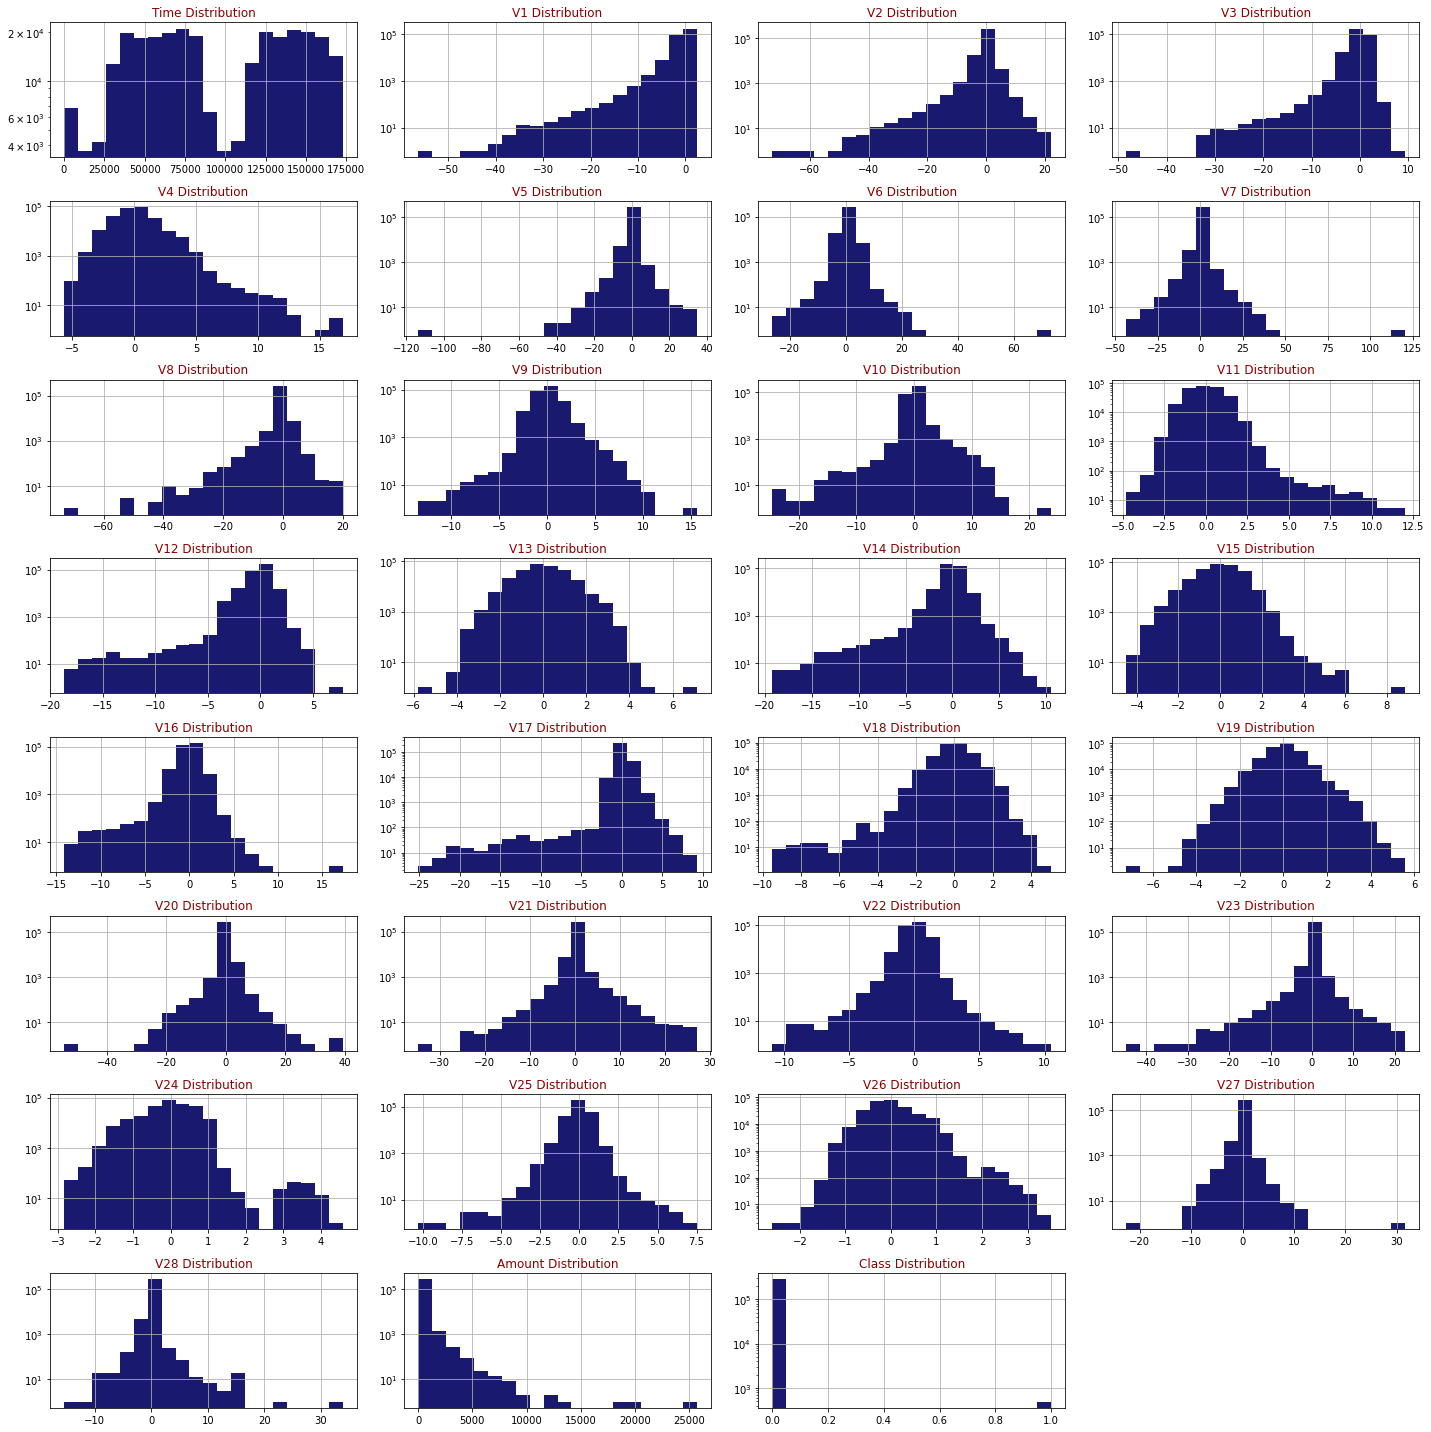

In [5]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()

draw_histograms(df,df.columns,8,4)

In [6]:
#### Independent and Dependent Features
X=df.drop("Class",axis=1)
y=df.Class

### Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV

In [8]:
log_class=LogisticRegression(solver='lbfgs', max_iter=1000)
grid={'C':10.0 **np.arange(-2,3),'penalty':['l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75)

In [10]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l2']},
             scoring='f1_macro')

In [11]:
y_pred=clf.predict(X_test)

In [12]:
import seaborn as sns

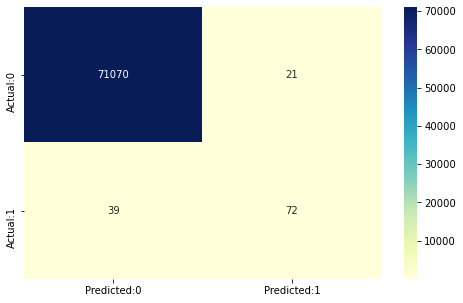

In [13]:
# confusion Matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [14]:
print(accuracy_score(y_test,y_pred))

0.9991573270413753


In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71091
           1       0.77      0.65      0.71       111

    accuracy                           1.00     71202
   macro avg       0.89      0.82      0.85     71202
weighted avg       1.00      1.00      1.00     71202



In [16]:
2*0.69*0.72/(0.72+0.69)

0.7046808510638298

### Random Forest Classifier :

In [17]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=5, min_samples_leaf=1)
classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5)

In [18]:
y_pred=classifier.predict(X_test)

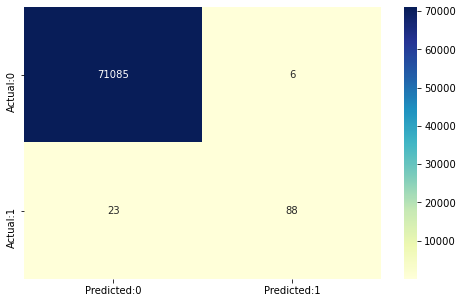

In [19]:
# confusion Matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");


In [20]:
print(accuracy_score(y_test,y_pred))

0.999592708069998


In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71091
           1       0.94      0.79      0.86       111

    accuracy                           1.00     71202
   macro avg       0.97      0.90      0.93     71202
weighted avg       1.00      1.00      1.00     71202



### CatBoost : Overfit Detector

In [22]:
# map categorical features
credit_catboost_ready_df = df.dropna() 

features = [feat for feat in list(credit_catboost_ready_df) if feat != 'Class']
print(features)
card_categories = np.where(credit_catboost_ready_df[features].dtypes != float)[0]
card_categories

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


array([], dtype=int64)

In [23]:
SEED = 1234

from catboost import CatBoostClassifier 


params = {'iterations':5000,
        'learning_rate':0.01,
        'cat_features':card_categories,
        'depth':3,
        'eval_metric':'AUC',
        'verbose':200,
        'od_type':"Iter", # overfit detector
        'od_wait':500, # most recent best iteration to wait before stopping
        'random_seed': SEED
          }

cat_model = CatBoostClassifier(**params)
cat_model.fit(X_train, y_train,   
          eval_set=(X_test, y_test), 
          use_best_model=True, # True if we don't want to save trees created after iteration with the best validation score
          plot=True  
         );

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.7536128	best: 0.7536128 (0)	total: 166ms	remaining: 13m 52s
200:	test: 0.9706212	best: 0.9707104 (167)	total: 4.05s	remaining: 1m 36s
400:	test: 0.9789816	best: 0.9789824 (399)	total: 7.91s	remaining: 1m 30s
600:	test: 0.9801514	best: 0.9801514 (600)	total: 11.7s	remaining: 1m 25s
800:	test: 0.9808517	best: 0.9808759 (770)	total: 15.8s	remaining: 1m 22s
1000:	test: 0.9807086	best: 0.9812063 (927)	total: 19.8s	remaining: 1m 18s
1200:	test: 0.9801057	best: 0.9812063 (927)	total: 23.7s	remaining: 1m 14s
1400:	test: 0.9800468	best: 0.9812063 (927)	total: 27.8s	remaining: 1m 11s
Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.9812062981
bestIteration = 927

Shrink model to first 928 iterations.


### AdaBoost Classifier:

In [24]:
RANDOM_STATE = 2018
NUM_ESTIMATORS = 100
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

In [25]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(random_state=RANDOM_STATE,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                             n_estimators=NUM_ESTIMATORS)

In [26]:
clf.fit(df[predictors],df['Class'].values)

AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=2018)

In [27]:
y_pred = clf.predict(df[predictors])

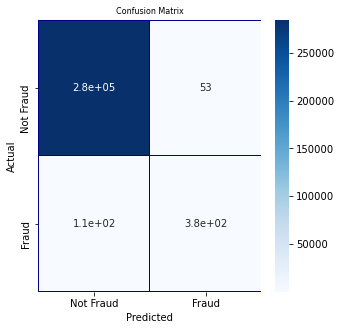

In [28]:
cm = pd.crosstab(df[target].values, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=8)
plt.show()

In [29]:
# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt



In [30]:
y_pred = cat_model.predict(X_test)

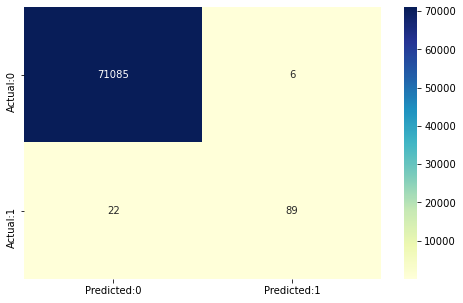

In [31]:
# confusion Matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [32]:
print(accuracy_score(y_test,y_pred))


0.9996067526193084


In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71091
           1       0.94      0.80      0.86       111

    accuracy                           1.00     71202
   macro avg       0.97      0.90      0.93     71202
weighted avg       1.00      1.00      1.00     71202



### SMOTE Analysis

In [34]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [35]:
from imblearn.over_sampling import SMOTE

from collections import Counter
oversample = SMOTE()

In [36]:

X_train_ns,y_train_ns=oversample.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 213224, 1: 381})
The number of classes after fit Counter({0: 213224, 1: 213224})


In [37]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [38]:
y_pred=classifier.predict(X_test)

In [39]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

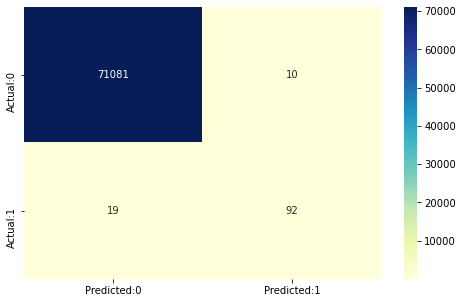

In [40]:
# confusion Matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [41]:
print(accuracy_score(y_test,y_pred))

0.999592708069998


In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71091
           1       0.90      0.83      0.86       111

    accuracy                           1.00     71202
   macro avg       0.95      0.91      0.93     71202
weighted avg       1.00      1.00      1.00     71202

